In [1]:
import geopandas as gpd
#import geojsonio
#import descartes
import matplotlib.pyplot as plt
import geojsonio
import descartes



In [2]:
#read GeoJSON data into a DataFrame

District_Boundary_df = gpd.read_file('Pitch/GeoJSON/District_Boundary.geojson')
#type(District_Boundary)
District_Boundary_df.head()

,OBJECTID_1,OBJECTID,Name,area,D_Name,Shape_Leng,area_1,Population,X,Y,Shape_Length,Shape_Area,geometry
0,1,1,????? ?????,781,D 4,14203.805827,7.810276,54076.0,67.0830,36.6987,14203.805827,7.810276e+06,"POLYGON ((67.08671 36.71374, 67.08629 36.71379..."
1,2,2,????? ???,1787,D10,22059.310596,17.870776,74805.0,67.1577,36.6923,22059.310596,1.787078e+07,"POLYGON ((67.14305 36.66304, 67.14350 36.66303..."
2,3,3,????? ???,1039,D 1,19416.391006,10.390477,50007.0,67.1244,36.6730,19416.391006,1.039048e+07,"POLYGON ((67.12092 36.71066, 67.12091 36.71066..."
3,4,4,????? ???,679,D 6,16661.136190,6.786827,42399.0,67.1354,36.6879,16661.136190,6.786827e+06,"POLYGON ((67.14305 36.66304, 67.14308 36.66321..."
4,5,5,????? ????,947,D 7,16541.095321,9.474520,82026.0,67.1432,36.7290,16541.095321,9.474520e+06,"POLYGON ((67.16720 36.72269, 67.16717 36.72280..."


In [3]:
#convert the DataFrame to a geojson object
#District_Boundary = District_Boundary.to_json()
#print(District_Boundary)

In [4]:
#visualize the District_Boundary as a series of Polygons with geojsonio
#geojsonio.display(District_Boundary)

In [5]:
district_Boundary = District_Boundary_df.loc[:, ["OBJECTID", "D_Name", "geometry"]].copy()
district_Boundary.head()

,OBJECTID,D_Name,geometry
0,1,D 4,"POLYGON ((67.08671 36.71374, 67.08629 36.71379..."
1,2,D10,"POLYGON ((67.14305 36.66304, 67.14350 36.66303..."
2,3,D 1,"POLYGON ((67.12092 36.71066, 67.12091 36.71066..."
3,4,D 6,"POLYGON ((67.14305 36.66304, 67.14308 36.66321..."
4,5,D 7,"POLYGON ((67.16720 36.72269, 67.16717 36.72280..."


In [4]:
type(district_Boundary)

geopandas.geodataframe.GeoDataFrame

Text(0.5, 269.07326732244206, 'Longitude')

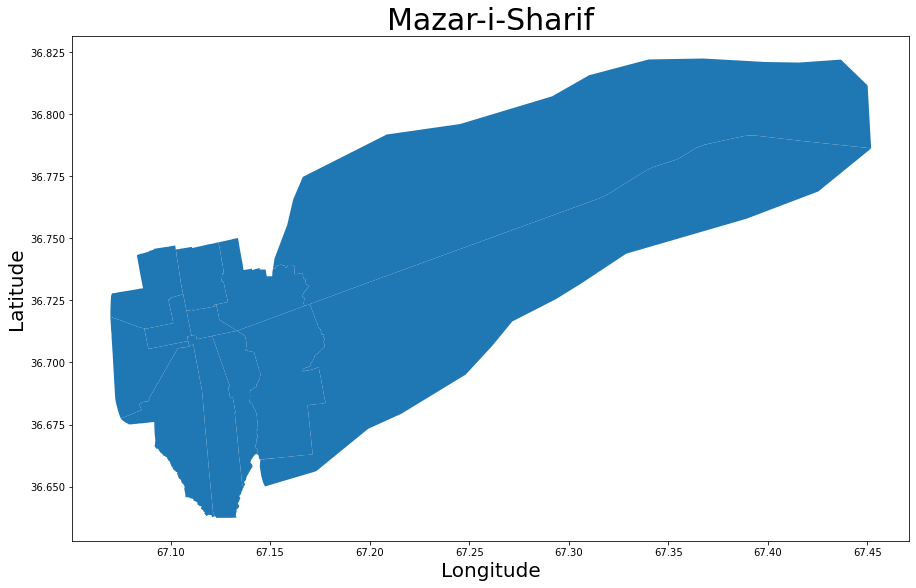

In [5]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [6]:
district_Boundary.loc[:, "Centroid"] = district_Boundary.centroid
district_Boundary.loc[:, "Area"] = district_Boundary.geometry.area / 10**6

print("Area of Mazar-i-Sharif: {} square kilometers".format(district_Boundary.Area.sum()))
print("CRS:", district_Boundary.crs)
district_Boundary.head()
district_Boundary.head()

Area of Mazar-i-Sharif: 3.2036371602764936e-08 square kilometers
CRS: epsg:4326


<ipython-input-6-73ba566a686e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.loc[:, "Centroid"] = district_Boundary.centroid
<ipython-input-6-73ba566a686e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.loc[:, "Area"] = district_Boundary.geometry.area / 10**6


,OBJECTID,D_Name,geometry,Centroid,Area
0,1,D 4,"POLYGON ((67.08671 36.71374, 67.08629 36.71379...",POINT (67.08299 36.69867),7.876539e-10
1,2,D10,"POLYGON ((67.14305 36.66304, 67.14350 36.66303...",POINT (67.15773 36.69228),1.802191e-09
2,3,D 1,"POLYGON ((67.12092 36.71066, 67.12091 36.71066...",POINT (67.12436 36.67303),1.047551e-09
3,4,D 6,"POLYGON ((67.14305 36.66304, 67.14308 36.66321...",POINT (67.13540 36.68792),6.843730e-10
4,5,D 7,"POLYGON ((67.16720 36.72269, 67.16717 36.72280...",POINT (67.14318 36.72903),9.559044e-10


<ipython-input-7-7305a9d7a450>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_Boundary.centroid.plot(color = 'yellow', ax=ax)


Text(0.5, 269.0817668472561, 'Longitude')

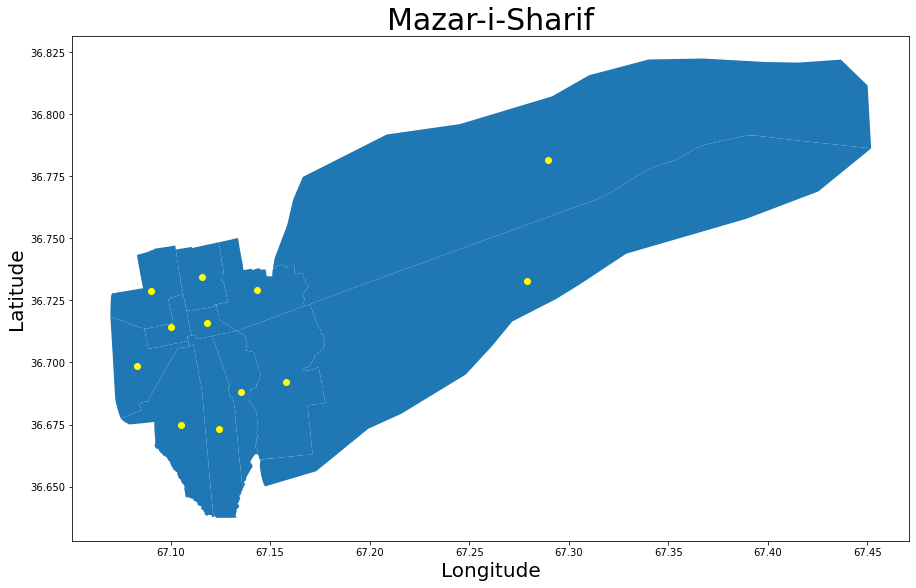

In [7]:
fig, ax = plt.subplots(figsize = (15,15))
district_Boundary.plot(ax=ax)
district_Boundary.centroid.plot(color = 'yellow', ax=ax)
ax.set_title('Mazar-i-Sharif',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})